# 과제 : 타이타닉 생존자 예측

목차
1. 문제 정의
2. 데이터 준비
3. 탐색적 데이터 분석
4. 데이터 전처리
5. 모델 훈련 및 예측
6. 평가

# 1. 문제 정의

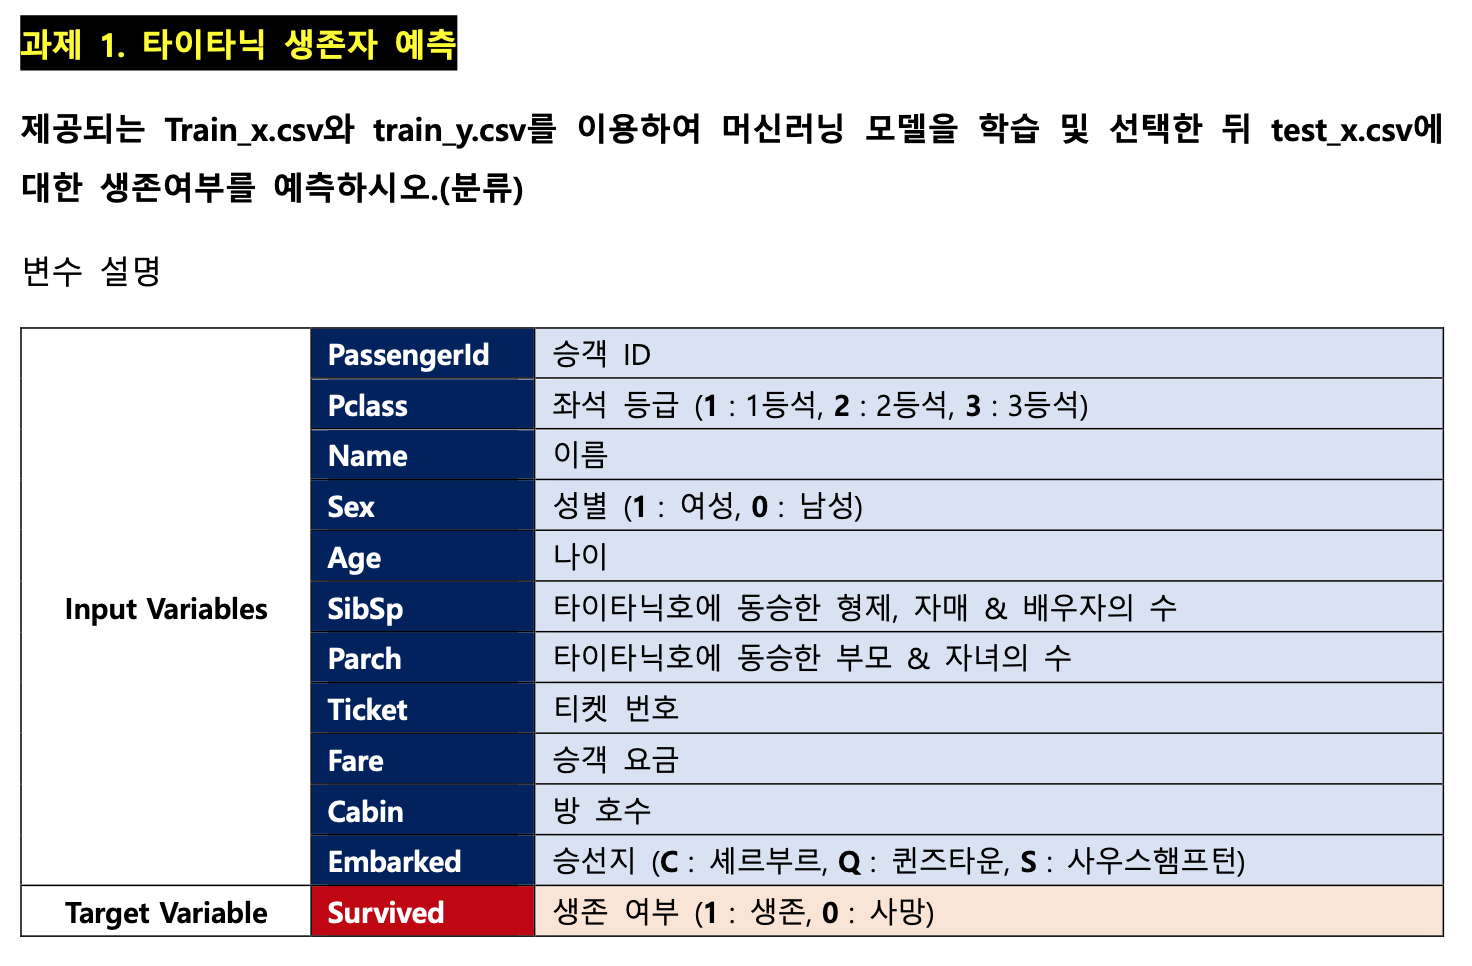

목표 : 타이타닉 호 승객 정보를 이용해, 타이타닉 사고로 인한 생존 여부를 예측

# 2. 데이터 준비

In [1]:
# 기본적인 라이브러리 불러오기
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 머신러닝 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
# 데이터를 우선 가져와야합니다.
train_x = pd.read_csv('./data/train_x.csv')
train_y = pd.read_csv('./data/train_y.csv')
test_x = pd.read_csv('./data/test_x.csv')

train_x.drop(['Unnamed: 0', 'PassengerId'], axis=1, inplace=True) # 필요없는(중복되는) 열 삭제
test_x.drop(['Unnamed: 0', 'PassengerId'], axis=1, inplace=True)
train_y.drop('Unnamed: 0', axis=1, inplace=True)
train_x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
1,2,"Slayter, Miss. Hilda Mary",female,30.00,0,0,234818,12.3500,NaN,Q
2,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
3,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,NaN,C
4,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
1042,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
1043,3,"Berglund, Mr. Karl Ivar Sven",male,22.00,0,0,PP 4348,9.3500,NaN,S
1044,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
1045,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


In [3]:
train_y

,Survived
0,1
1,1
2,0
3,0
4,0
...,...
1042,0
1043,0
1044,0
1045,1


In [4]:
test_x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
1,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S
2,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,NaN,S
3,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
4,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...
257,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
258,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S
259,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S
260,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,S


In [5]:
train_df = pd.concat([train_x, train_y], axis=1)
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S,1
1,2,"Slayter, Miss. Hilda Mary",female,30.00,0,0,234818,12.3500,NaN,Q,1
2,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,0
3,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,NaN,C,0
4,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...
1042,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0
1043,3,"Berglund, Mr. Karl Ivar Sven",male,22.00,0,0,PP 4348,9.3500,NaN,S,0
1044,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
1045,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S,1


# 3. 탐색적 데이터 분석(EDA)

## 데이터 확인

In [6]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Name      1047 non-null   object 
 2   Sex       1047 non-null   object 
 3   Age       847 non-null    float64
 4   SibSp     1047 non-null   int64  
 5   Parch     1047 non-null   int64  
 6   Ticket    1047 non-null   object 
 7   Fare      1046 non-null   float64
 8   Cabin     239 non-null    object 
 9   Embarked  1045 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 81.9+ KB


In [7]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    262 non-null    int64  
 1   Name      262 non-null    object 
 2   Sex       262 non-null    object 
 3   Age       199 non-null    float64
 4   SibSp     262 non-null    int64  
 5   Parch     262 non-null    int64  
 6   Ticket    262 non-null    object 
 7   Fare      262 non-null    float64
 8   Cabin     56 non-null     object 
 9   Embarked  262 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.6+ KB


Categorical
- categorical: Survived, Sex, Embarked
- ordinal: Pclass

Numerical
- continous: Age, Fare
- Discrete: SibSp, Parch

In [8]:
train_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         200
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       808
Embarked      2
Survived      0
dtype: int64

- Age, Fare, Cabin, Embarked 변수에 결측값이 존재

In [9]:
train_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1047.000000,847.000000,1047.000000,1047.000000,1046.000000,1047.000000
mean,2.274117,29.602420,0.520535,0.396371,34.190563,0.382044
std,0.841291,14.503786,1.052770,0.863818,53.233936,0.486119
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.387500,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


- Survived은 0 또는 1 값을 갖는 categorical feature
- 평균 생존율은 약 38%


In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1047,1047,1047,239,1045
unique,1046,2,770,161,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,674,8,5,722


- Name : count와 unique가 거의 동일(생존여부와 큰 관련 X) → 제거 대상 변수
- Sex : 1047명 중 남성 674명
- Ticket : 중복값 많음 → 제거 대상 변수
- Cabin : 중복값 존재, null 값 많음 → 제거 대상 변수
- Embarked: 가장 많은 승선지는 S (722명) → 최빈값으로 결측치 대체

## feature별로 target에 미치는 영향 분석

### sex별 평균 생존율 비교

In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.831099
1,male,0.133531


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

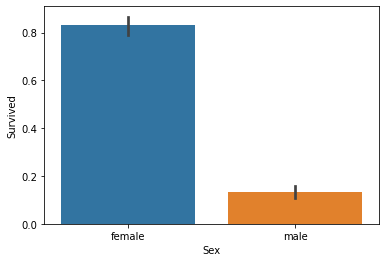

In [12]:
sns.barplot(x='Sex', y = 'Survived', data=train_df)

남성이 여성에 비해 평균 생존율이 매우 낮음

### Pclass별 평균 생존율 비교

In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.578947
1,2,0.438596
2,3,0.264014


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

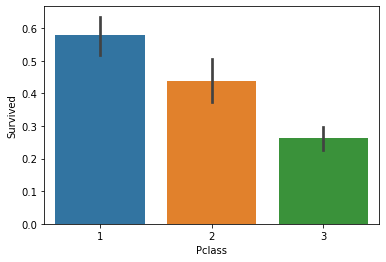

In [14]:
sns.barplot(x='Pclass', y = 'Survived', data=train_df)

좌석 등급이 높을수록 평균 생존율이 높음

### Age별로 평균 생존율 비교

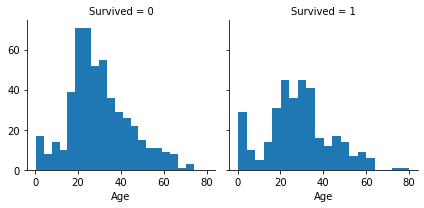

In [15]:
fg = sns.FacetGrid(train_df, col='Survived')
fg.map(plt.hist, 'Age', bins=20)

     Age_Group  Survived
1         Baby  0.647059
6  Young Adult  0.422764
0        Adult  0.400000
5     Teenager  0.394737
4      Student  0.336788
2        Child  0.333333
3      Elderly  0.302632


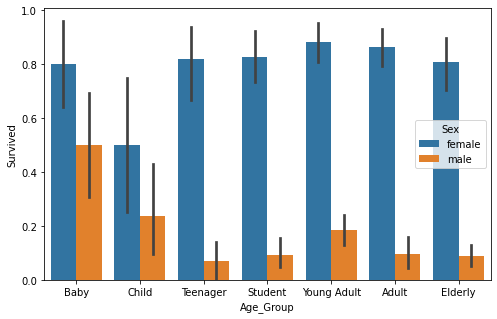

In [16]:
def get_category(age):
    age_group = ''
    if age <= 5: age_group = 'Baby'
    elif age <= 12: age_group = 'Child'
    elif age <= 18: age_group = 'Teenager'
    elif age <= 25: age_group = 'Student'
    elif age <= 35: age_group = 'Young Adult'
    elif age <= 60: age_group = 'Adult'
    else: age_group = 'Elderly'
    return age_group

plt.figure(figsize=(8,5))

group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

train_df['Age_Group'] = train_df['Age'].apply(lambda x : get_category(x))
print(train_df[['Age_Group', 'Survived']].groupby(['Age_Group'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.barplot(x='Age_Group', y = 'Survived', hue='Sex', data=train_df, order=group_names)
train_df.drop('Age_Group', axis=1, inplace=True)

5세 이하 유아들의 생존율이 높았으며, 대부분의 승객이 15~35세이고, 대다수의 15~25세 승객이 생존하지 못함

### SibSp, Parch별 평균 생존율 비교

In [17]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.520599
2,2,0.406250
0,0,0.345272
3,3,0.210526
4,4,0.157895
5,5,0.000000
6,8,0.000000


In [18]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.571429
1,1,0.542857
2,2,0.500000
0,0,0.341310
4,4,0.333333
5,5,0.200000
6,6,0.000000
7,9,0.000000


큰 의미가 없어보이므로 둘다 합쳐서 Family로 만들어줌

### Embarked, Survived별 Fare, Sex비교

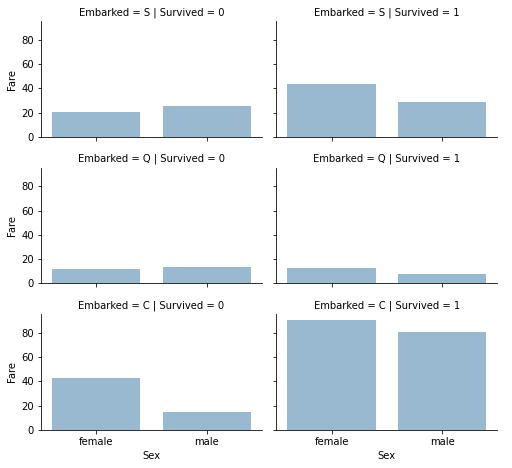

In [19]:
fg = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
fg.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
fg.add_legend()

Embarked=S, C일 때 높은 요금을 지불한 승객의 생존율이 높음
→ Embarked는 생존율과 상관성이 있는 것으로 판단

# 데이터 전처리
- 분석에 필요없는 변수 제거
- 결측치 대체
- 변수를 numeric하게 변환

## 필요없는 변수 제거

In [20]:
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x = test_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)
preprocessing = [train_df, test_x]

## Sex

In [21]:
sex_mapping = {"female": 1, "male": 0}
for dataset in preprocessing:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping).astype(int) # 성별을 숫자로 매핑

train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,0.92,1,2,27.7500,S,1
1,2,1,30.00,0,0,12.3500,Q,1
2,3,0,NaN,0,0,14.4583,C,0
3,3,0,NaN,0,0,7.2292,C,0
4,3,0,NaN,1,0,7.7500,Q,0


## Age

In [22]:
for dataset in preprocessing:
    dataset['Age'] = dataset['Age'].fillna(train_x['Age'].median()).astype(int) # 중앙값으로 결측치 대체

train_df['Age_section'] = pd.cut(train_df['Age'], 5) # 동일한 길이만큼 5개의 구간으로 나눔

# 연령대별 평균 생존율 구하기
train_df[['Age_section', 'Survived']].groupby(['Age_section'], as_index=False).mean().sort_values(by='Age_section', ascending=True)

,Age_section,Survived
0,"(-0.08, 16.0]",0.500000
1,"(16.0, 32.0]",0.347134
2,"(32.0, 48.0]",0.415459
3,"(48.0, 64.0]",0.418605
4,"(64.0, 80.0]",0.200000


In [23]:
# 연령대별로 숫자로 매핑
for dataset in preprocessing:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

# 필요없는 변수 제거
train_df = train_df.drop(['Age_section'], axis=1)
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,0,1,2,27.7500,S,1
1,2,1,1,0,0,12.3500,Q,1
2,3,0,1,0,0,14.4583,C,0
3,3,0,1,0,0,7.2292,C,0
4,3,0,1,1,0,7.7500,Q,0
...,...,...,...,...,...,...,...,...
1042,1,0,1,0,0,52.0000,S,0
1043,3,0,1,0,0,9.3500,S,0
1044,2,0,1,0,0,0.0000,S,0
1045,3,0,0,1,1,11.1333,S,1


## Family = SibSb + Parch

In [24]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1      # +1은 자기자신을 나타냄
test_x["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1

# FamilySize 별 평균 생존율 구하기
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.729730
2,3,0.542636
1,2,0.535714
0,1,0.303571
6,7,0.285714
5,6,0.181818
4,5,0.166667
7,8,0.000000
8,11,0.000000


FamilySize는 자기자신을 포함해서 동반한 가족수를 의미함

FamilySize는=1이면 가족과 동반하지 않았음을 의미함

In [25]:
train_df["Family"] = 0
train_df.loc[train_df['FamilySize'] == 1, 'Family'] = 1

test_x["Family"] = 0
test_x.loc[test_x['FamilySize'] == 1, 'Family'] = 1

# IsAlone 별 평균 생존율 구하기
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.494200
1,1,0.303571


In [26]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_x = test_x.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
preprocessing = [train_df, test_x]

## Embarked

In [27]:
freq_port = train_df.Embarked.dropna().mode()[0] 

train_df['Embarked'] = train_df['Embarked'].fillna(freq_port) # 최빈값으로 결측치 대체
test_x['Embarked'] = test_x['Embarked'].fillna(freq_port)

# Embarked 별 평균 생존율 구하기
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.493392
1,Q,0.458333
2,S,0.337017


Embarked=C일 때 평균 생존율이 가장 높음

In [28]:
Embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_df['Embarked'] = train_df['Embarked'].map(Embarked_mapping).astype(int)
test_x['Embarked'] = test_x['Embarked'].map(Embarked_mapping).astype(int)

## Fare

In [29]:
train_df['Fare'].fillna(test_x['Fare'].dropna().median(), inplace=True) # 중앙값으로 결측치 대체
test_x['Fare'].fillna(test_x['Fare'].dropna().median(), inplace=True)

In [30]:
train_df['Fare_section'] = pd.qcut(train_df['Fare'], 4)     # 동일한 개수만큼 4개의 구간으로 나눔

# train set에서 요금대별 평균 생존율 구하기
train_df[['Fare_section', 'Survived']].groupby(['Fare_section'], as_index=False).mean().sort_values(by='Fare_section', ascending=True)

,Fare_section,Survived
0,"(-0.001, 7.925]",0.233577
1,"(7.925, 14.5]",0.296443
2,"(14.5, 31.388]",0.420849
3,"(31.388, 512.329]",0.582375


In [31]:
for dataset in preprocessing:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

# 필요없는 변수(FareBand) 제거하기
train_df = train_df.drop(['Fare_section'], axis=1)

In [32]:
train_df

,Pclass,Sex,Age,Fare,Embarked,Survived,Family
0,2,1,0,2,0,1,0
1,2,1,1,1,2,1,1
2,3,0,1,2,1,0,1
3,3,0,1,0,1,0,1
4,3,0,1,0,2,0,0
...,...,...,...,...,...,...,...
1042,1,0,1,3,0,0,1
1043,3,0,1,1,0,0,1
1044,2,0,1,0,0,0,1
1045,3,0,0,1,0,1,0


In [33]:
test_x

,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,2,3,0,0
1,3,0,1,0,0,1
2,2,1,0,3,0,1
3,2,1,1,2,0,1
4,3,0,1,2,0,0
...,...,...,...,...,...,...
257,2,0,1,2,0,0
258,3,0,1,0,0,1
259,3,1,1,0,0,1
260,3,0,1,1,0,0


# 모델 학습 및 예측

## 학습 및 예측을 위한 데이터 준비

In [34]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_x.copy()
X_train.shape, Y_train.shape, X_test.shape

((1047, 6), (1047,), (262, 6))

## 머신러닝 기법을 통한 학습 및 예측

In [36]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(lr_clf.score(X_train, Y_train)))

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(dt_clf.score(X_train, Y_train)))

rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(rf_clf.score(X_train, Y_train)))

svc_clf = SVC()
svc_clf.fit(X_train, Y_train)
svc_pred = svc_clf.predict(X_test)
print('SVC 정확도: {0:.4f}'.format(svc_clf.score(X_train, Y_train)))

knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, Y_train)
knn_pred = knn_clf.predict(X_test)
print('KNeighborsClassifier 정확도: {0:.4f}'.format(knn_clf.score(X_train, Y_train)))

xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=5)
xgb_clf.fit(X_train, Y_train)
xgb_pred = xgb_clf.predict(X_test)
print('XGBClassifier 정확도: {0:.4f}'.format(xgb_clf.score(X_train, Y_train)))


LogisticRegression 정확도: 0.8539
DecisionTreeClassifier 정확도: 0.8797
RandomForestClassifier 정확도: 0.8797
SVC 정확도: 0.8539
KNeighborsClassifier 정확도: 0.8615
XGBClassifier 정확도: 0.8797


# 평가

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_train, Y_train, test_size=0.3, random_state=11)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier(n_neighbors = 3)
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=5)


def get_clf_eval(model, y_test , pred):
    print('정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
    print('ROC: {0:.4f}'.format(roc_auc_score(y_test, pred)))
    print('f1: {0:.4f}'.format(f1_score(y_test, pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train , y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression ROC: {0:.4f}'.format(roc_auc_score(y_test, lr_pred)))
print('LogisticRegression f1: {0:.4f}'.format(f1_score(y_test, lr_pred)))
print()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train , y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier ROC: {0:.4f}'.format(roc_auc_score(y_test, dt_pred)))
print('DecisionTreeClassifier f1: {0:.4f}'.format(f1_score(y_test, dt_pred)))
print()

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train , y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier ROC: {0:.4f}'.format(roc_auc_score(y_test, rf_pred)))
print('RandomForestClassifier f1: {0:.4f}'.format(f1_score(y_test, rf_pred)))
print()

# SVC 학습/예측/평가
svc_clf.fit(x_train , y_train)
svc_pred = svc_clf.predict(x_test)
print('SVC 정확도: {0:.4f}'.format(accuracy_score(y_test, svc_pred)))
print('SVC ROC: {0:.4f}'.format(roc_auc_score(y_test, svc_pred)))
print('SVC f1: {0:.4f}'.format(f1_score(y_test, svc_pred)))
print()

# KNeighborsClassifier 학습/예측/평가
knn_clf.fit(x_train , y_train)
knn_pred = knn_clf.predict(x_test)
print('KNeighborsClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('KNeighborsClassifier ROC: {0:.4f}'.format(roc_auc_score(y_test, knn_pred)))
print('KNeighborsClassifier f1: {0:.4f}'.format(f1_score(y_test, knn_pred)))
print()

# XGBoost 학습/예측/평가
xgb_clf.fit(x_train , y_train)
xgb_pred = xgb_clf.predict(x_test)
print('XGBoost 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))
print('XGBoost ROC: {0:.4f}'.format(roc_auc_score(y_test, xgb_pred)))
print('XGBoost f1: {0:.4f}'.format(f1_score(y_test, xgb_pred)))


LogisticRegression 정확도: 0.8413
LogisticRegression ROC: 0.8283
LogisticRegression f1: 0.7899

DecisionTreeClassifier 정확도: 0.8190
DecisionTreeClassifier ROC: 0.7920
DecisionTreeClassifier f1: 0.7421

RandomForestClassifier 정확도:0.8317
RandomForestClassifier ROC: 0.8099
RandomForestClassifier f1: 0.7665

SVC 정확도: 0.8413
SVC ROC: 0.8283
SVC f1: 0.7899

KNeighborsClassifier 정확도: 0.8190
KNeighborsClassifier ROC: 0.7981
KNeighborsClassifier f1: 0.7511

XGBoost 정확도: 0.8286
XGBoost ROC: 0.8073
XGBoost f1: 0.7632


## 최적의 파라미터 찾기

In [39]:
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

param_grid = {
    'penalty':['l2', 'l1'],
    'C':[0.01, 0.1, 1, 5, 10]
}

grid_search = GridSearchCV(lr_clf , param_grid=param_grid , scoring='accuracy' , cv=5)
grid_search.fit(x_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_search.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_search.best_score_))
best_grid = grid_search.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
predictions = best_grid.predict(x_test)
accuracy = accuracy_score(y_test , predictions)
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.8566
테스트 세트에서의 LogisticRegression 정확도 : 0.8413


In [40]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

grid_search = GridSearchCV(dt_clf , param_grid=param_grid , scoring='accuracy' , cv=5)
grid_search.fit(x_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_search.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_search.best_score_))
best_grid = grid_search.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
predictions = best_grid.predict(x_test)
accuracy = accuracy_score(y_test , predictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8}
GridSearchCV 최고 정확도: 0.8566
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8413


In [105]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 300, 500],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

grid_search = GridSearchCV(rf_clf , param_grid=param_grid , scoring='accuracy' , cv=5)
grid_search.fit(x_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_search.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_search.best_score_))
best_grid = grid_search.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
predictions = best_grid.predict(x_test)
accuracy = accuracy_score(y_test , predictions)
print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}
GridSearchCV 최고 정확도: 0.8594
테스트 세트에서의 RandomForestClassifier 정확도 : 0.8413


In [106]:
from sklearn.model_selection import GridSearchCV

svc_clf = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_grid_search = GridSearchCV(svc_clf , param_grid=param_grid , scoring='accuracy' , cv=5)
svc_grid_search.fit(x_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',svc_grid_search.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(svc_grid_search.best_score_))
best_grid = svc_grid_search.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
predictions = best_grid.predict(x_test)
accuracy = accuracy_score(y_test , predictions)
print('테스트 세트에서의 SVC 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
GridSearchCV 최고 정확도: 0.8621
테스트 세트에서의 SVC 정확도 : 0.8444


In [107]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_grid_search = GridSearchCV(knn_clf , param_grid=param_grid , scoring='accuracy' , cv=5)
knn_grid_search.fit(x_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',knn_grid_search.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(knn_grid_search.best_score_))
best_grid = knn_grid_search.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
predictions = best_grid.predict(x_test)
accuracy = accuracy_score(y_test , predictions)
print('테스트 세트에서의 KNeighborsClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}
GridSearchCV 최고 정확도: 0.8539
테스트 세트에서의 KNeighborsClassifier 정확도 : 0.8190


In [41]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier()

param_grid = {
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9], 
}

grid_search = GridSearchCV(xgb_clf , param_grid=param_grid , scoring='accuracy' , cv=5)
grid_search.fit(x_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_search.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_search.best_score_))
best_grid = grid_search.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
predictions = best_grid.predict(x_test)
accuracy = accuracy_score(y_test , predictions)
print('테스트 세트에서의 XGBClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.8648
테스트 세트에서의 XGBClassifier 정확도 : 0.8444


# 제출 파일 생성

In [43]:
grid_search

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 1, 2, 3],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [42]:
predictions = grid_search.predict(test_x)
submission = pd.DataFrame({'PassengerId':test_x.index, 'Survived':predictions})
submission.to_csv('submission.csv', index=False)